In [8]:
bad_lenses = []
for f in tqdm(cooperative_analyticalLrn_folders):
    if (float(f.split('_')[-1]) == bad_distances).any():
        checkpoint = os.path.join(path_cooperative,"analyticalLensInit",f,'epoch=4-step=6250.ckpt')
        model = cooperative.CooperativeOptimization.load_from_checkpoint(checkpoint, strict=True)
        bad_lenses.append(model.lrn.layers[1].phase.data.squeeze().numpy())

100%|██████████| 101/101 [00:23<00:00,  4.29it/s]


In [9]:
# plt.close('all')
# for l in bad_lenses:
#     fig,ax = plt.subplots(1,1,figsize=(10,10))
#     ax.imshow(l%(np.pi *2))

In [10]:
good_lenses = []
for f in tqdm(cooperative_analyticalLrn_folders):
    if (float(f.split('_')[-1]) == good_distances).any():
        checkpoint = os.path.join(path_cooperative,"analyticalLensInit",f,'epoch=4-step=6250.ckpt')
        model = cooperative.CooperativeOptimization.load_from_checkpoint(checkpoint, strict=True)
        good_lenses.append(model.lrn.layers[1].phase.data.squeeze().numpy())

100%|██████████| 101/101 [00:41<00:00,  2.42it/s]


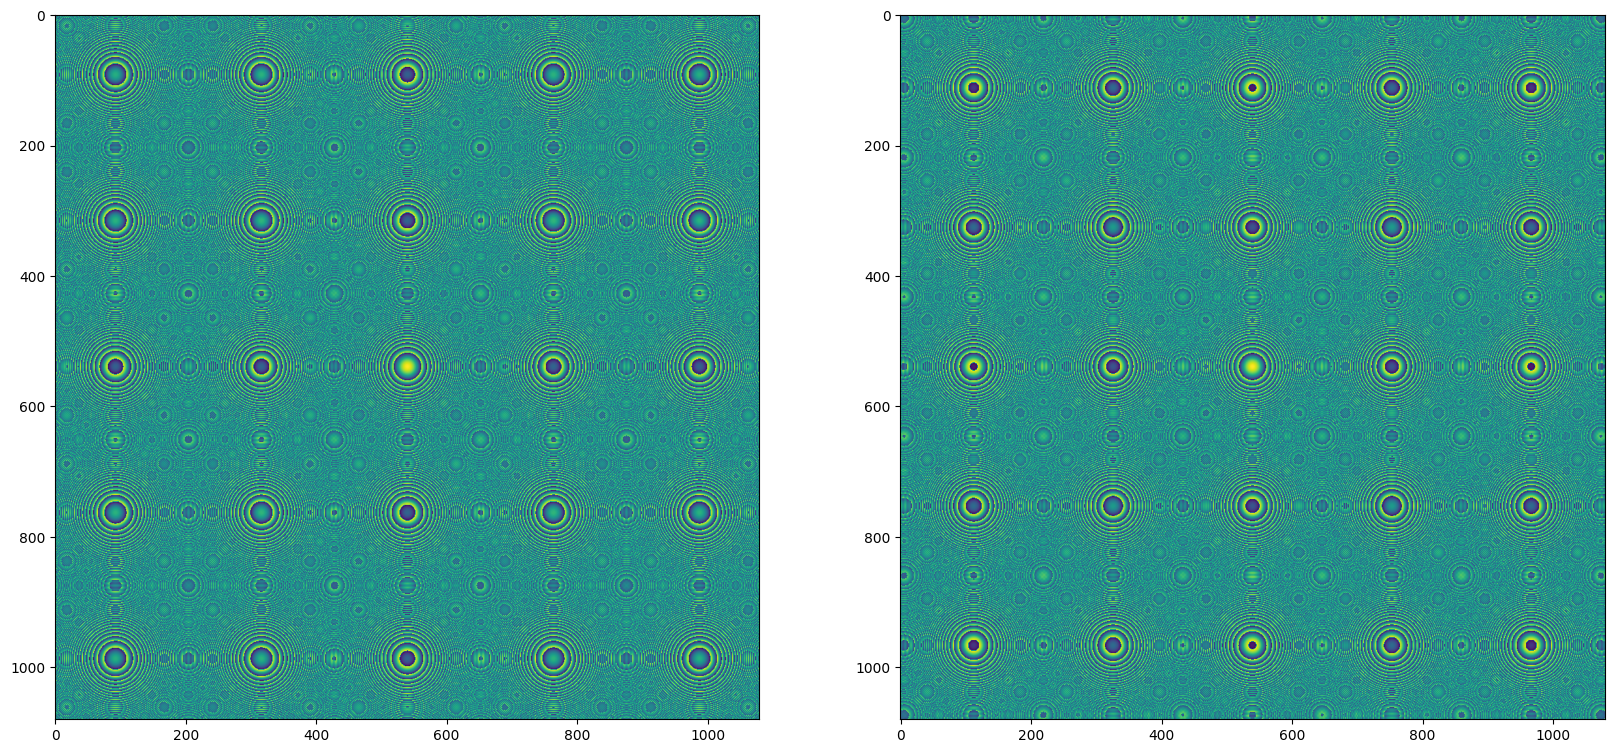

In [11]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(bad_lenses[0] % (np.pi *2))
ax[1].imshow(good_lenses[10] % (np.pi *2))

In [15]:
good_checkpoint = os.path.join(path_cooperative,"analyticalLensInit",'coop_0.0190','epoch=4-step=6250.ckpt')
bad_checkpoint = os.path.join(path_cooperative,"analyticalLensInit",'coop_0.0199','epoch=4-step=6250.ckpt')
good_model = cooperative.CooperativeOptimization.load_from_checkpoint(good_checkpoint, strict=True)
bad_model = cooperative.CooperativeOptimization.load_from_checkpoint(bad_checkpoint, strict=True)

In [18]:
batch = (image, torch.tensor(5))
good_output = good_model.shared_step(batch,0)
bad_output = bad_model.shared_step(batch,0)

In [23]:
#return output_wavefronts, amplitudes, normalized_amplitudes, images, normalized_images, target

tensor([[-3.5426, -6.7619, -3.3949, -3.1620, -5.1572, -4.6159, -5.7046, -6.5450,
         -2.0721, -3.0760]], grad_fn=<AddmmBackward0>)

In [29]:
good_image = good_output[0][3].squeeze().detach().numpy()
bad_image = bad_output[0][3].squeeze().detach().numpy()

print(np.max(good_image))
print(np.min(good_image))
print(np.mean(good_image))
print(np.std(good_image))

print(np.max(bad_image))
print(np.min(bad_image))
print(np.mean(bad_image))
print(np.std(bad_image))

3.477972280108562
5.58554166349437e-12
0.35275110392626025
0.49182488960518767
3.389187424817827
5.966157502844682e-13
0.33140029208693145
0.4767274231836877


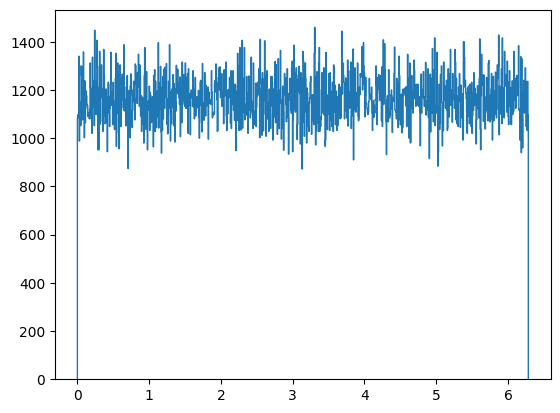

In [48]:
counts,bins = np.histogram(good_lenses[-3]%(np.pi*2), bins=1000)
plt.stairs(counts, bins)

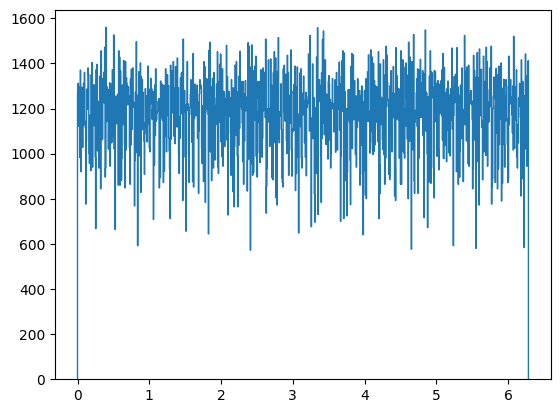

In [49]:
counts,bins = np.histogram(bad_lenses[-3]%(np.pi*2), bins=1000)
plt.stairs(counts, bins)

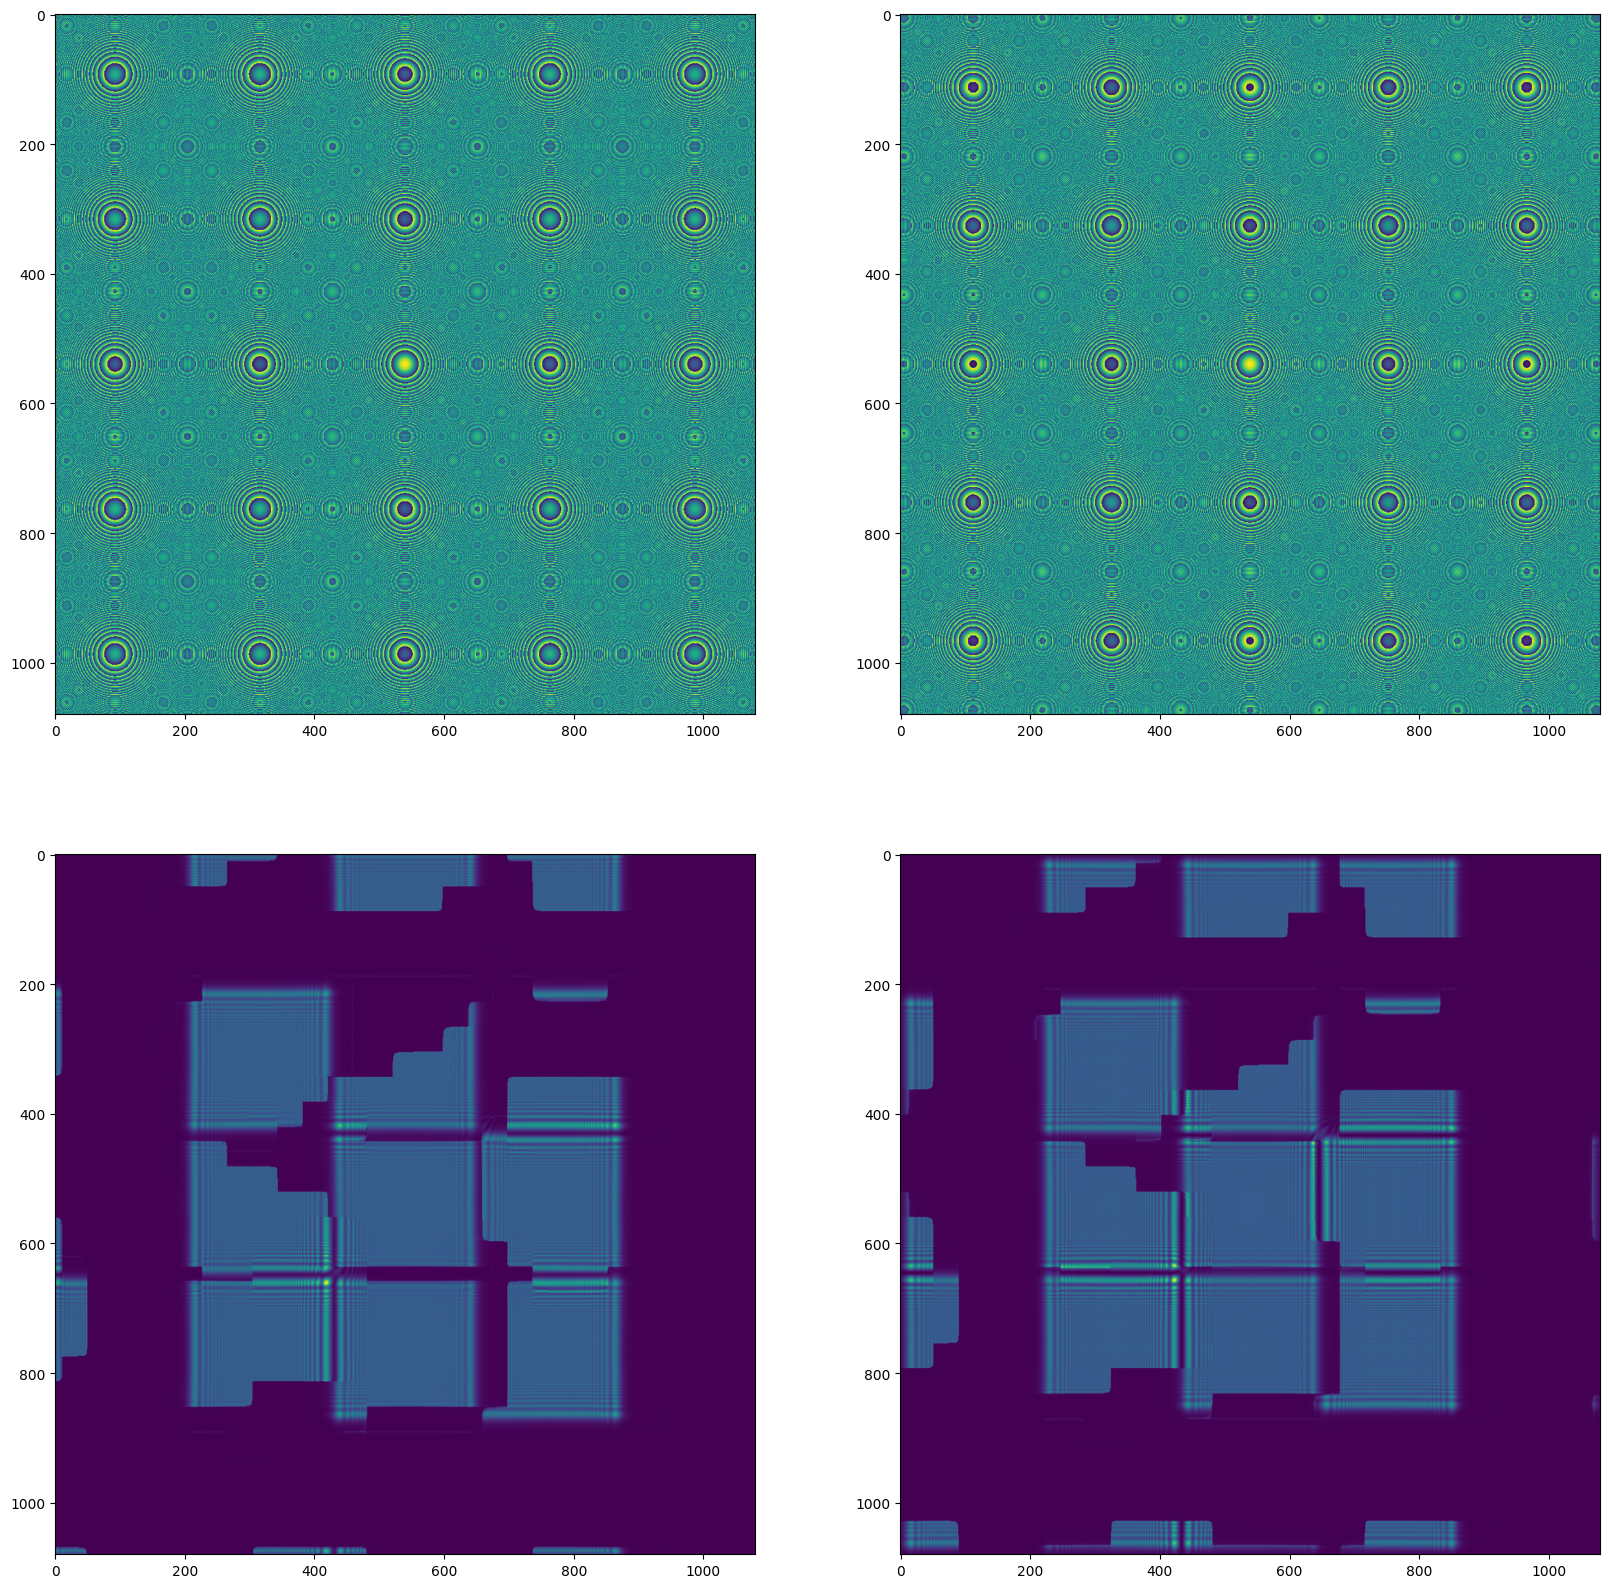

In [27]:
fig,ax = plt.subplots(2,2,figsize=(20,20))
ax[0][0].imshow(bad_lenses[0] % (np.pi *2))
ax[0][1].imshow(good_lenses[10] % (np.pi *2))
ax[1][0].imshow(bad_image)
ax[1][1].imshow(good_image)